# Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing Dataset and EDA

In [2]:
df = pd.read_csv('/content/drive/MyDrive/My Data Science Stuff/Imarticus/XGBOOST/bank-additional-full.csv', delimiter=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
cy = {'y': {'yes':1, 'no':0}}
df.replace(cy, inplace=True)

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [5]:
X = df.iloc[:, : -1]
z = df.iloc[:, -1]
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [6]:
z.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [7]:
categorical = df.describe(include='object').T.index.tolist()

In [8]:
X = pd.get_dummies(X, columns=categorical, drop_first=True)

# Handling Imbalance Dataset

In [9]:
from collections import Counter

In [10]:
Counter(z)

Counter({0: 36548, 1: 4640})

In [11]:
pd.value_counts(z).head(1)/len(z)

0    0.887346
Name: y, dtype: float64

Here we can see that this is imbalanced dataset

In [12]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(sampling_strategy=0.4,random_state=42)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [13]:
X_new,z_new = smt.fit_resample(X, z)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [14]:
Counter(z_new)

Counter({0: 36086, 1: 14157})

Now we have much balance datapoints of both classes for training model

# Splitting datasets in test and train

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size = 0.33, random_state=42)

# Scaling our Datasets

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=X_test.columns)

X_test = sc.transform(X_test)
X_test = pd.DataFrame(X_test, columns=X_train.columns)

In [17]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [18]:
xgb= XGBClassifier()
lr= LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
knn=KNeighborsClassifier()

In [19]:
xgb.fit(X_train, z_train)
lr.fit(X_train,z_train)
dt.fit(X_train,z_train)
rf.fit(X_train,z_train)
knn.fit(X_train,z_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

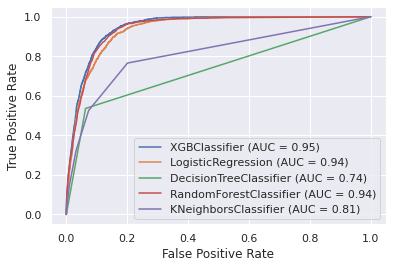

In [20]:
from sklearn.metrics import plot_roc_curve
roc=plot_roc_curve(xgb,X_test,z_test)
plot_roc_curve(lr,X_test,z_test,ax=roc.ax_);
plot_roc_curve(dt,X_test,z_test,ax=roc.ax_);
plot_roc_curve(rf,X_test,z_test,ax=roc.ax_);
plot_roc_curve(knn,X_test,z_test,ax=roc.ax_);

In [21]:
xgb_z_pred = xgb.predict(X_test)
lr_z_pred = lr.predict(X_test)
dt_z_pred = dt.predict(X_test)
rf_z_pred = rf.predict(X_test)
knn_z_pred = xgb.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score
print(f"XGBOOST ACC: {accuracy_score(z_test, xgb_z_pred)*100}")
print(f"Logistic Reg ACC: {accuracy_score(z_test, lr_z_pred)*100}")
print(f"Decision Tree ACC: {accuracy_score(z_test, dt_z_pred)*100}")
print(f"Random Forest ACC: {accuracy_score(z_test, rf_z_pred)*100}")
print(f"KNN ACC: {accuracy_score(z_test, knn_z_pred)*100}")

XGBOOST ACC: 91.62804384609726
Logistic Reg ACC: 91.05421908335173
Decision Tree ACC: 89.14146987419996
Random Forest ACC: 91.0174354447142
KNN ACC: 91.62804384609726
